In [ ]:
channels = ["3.16 Hz", "5.62 Hz", "10 Hz", "17.6 Hz",
            "31.6 Hz", "56.2 Hz", "100 Hz", "176 Hz",
            "316 Hz", "562 Hz", "1 kHz", '1.76 kHz']

In [13]:
import numpy as np
def reg1dim(x, y):
    n = x.size
    a = ((np.dot(x, y)- np.sum(y) * np.sum(x)/n)/
        (np.sum(x ** 2) - np.sum(x)**2 / n))
    b = (np.sum(y) - a * np.sum(x))/n
    return a, b

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import load
import pytplot
import pyspedas

trange = ['1993-10-09', '1993-10-10']
load.mca(trange)

tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth) 
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
Emax_tvar = pytplot.get_data('Emax_pwr')
freq = Emax_tvar.v
Emax = Emax_tvar.y
times = Emax_tvar.times

alpha_list = []
Emax_res_list = []

fit_frange = np.log10(freq[2:9])

for j in range(times.size):
    fit_Emax = np.log10(Emax[j][2:9])
    a, b = reg1dim(fit_frange, fit_Emax)
    alpha_list.append(a)
    
    p0 = 10**b
    Emax_lsm = p0*freq**a
    Emax_res = (np.log10(Emax[j]) - np.log10(Emax_lsm)).tolist()
    Emax_res_list.append(Emax_res)

pytplot.store_data('Emax_pwr_law_alpha', data={'x':times, 'y':alpha_list})
pytplot.store_data('Emax_pwr_res', data={'x':times, 'y':Emax_res_list, 'v':freq})
pytplot.options('Emax_pwr_res', 'spec', 1)
pytplot.options('Emax_pwr_res', 'ylog', 1)
pytplot.options('Emax_pwr_res', 'Colormap', 'coolwarm')

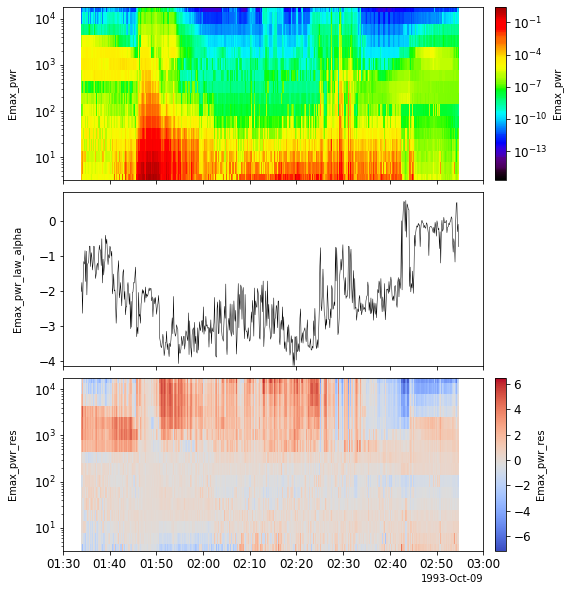

In [58]:
pytplot.tlimit(['1993-10-09 01:30:00', '1993-10-09 03:00:00'])
pytplot.options('Emax_pwr', 'spec', 1)
pytplot.options('Emax_pwr', 'ylog', 1)
pytplot.options('Emax_pwr', 'zlog', 1)
pytplot.tplot(['Emax_pwr', 'Emax_pwr_law_alpha', 'Emax_pwr_res'])

In [40]:
Emax_res_list

[[3.004027734367779,
  2.4575195304969855,
  1.0108006507979157,
  -0.33607360281233234,
  -1.3818101911112404,
  0.27168157567144213,
  0.22496268678485087,
  -0.12191153921370024,
  0.3323518812252715,
  0.5858436392700748,
  0.33912382432086474,
  -1.407749463205315,
  -2.7534860691567022,
  -4.799994312853256,
  -4.346714112080502,
  -2.9935873996066817],
 [3.4716138702320363,
  2.714450835428626,
  1.3569817573652987,
  -0.6007104054856729,
  -1.056756594614658,
  -0.013919658764594445,
  -0.0713887460154421,
  -0.7290808812547152,
  1.1148734151913358,
  0.05771034230352079,
  -0.3997587173356294,
  -2.2574513446140063,
  -3.7134970745583136,
  -5.870659672350326,
  -5.928129193104672,
  -4.385821820383049],
 [4.118016610710551,
  2.242992972574622,
  0.8678196937666653,
  -0.6074641362595976,
  -1.0819402722879978,
  0.5430360602295465,
  0.3678627722340684,
  -0.20742007650618,
  0.11810379620329847,
  1.0430801199829647,
  0.6679059059248686,
  -0.907376958017327,
  -2.2818531

In [28]:
times.size, np.shape(Emax_res_list)

(10800, (10801,))

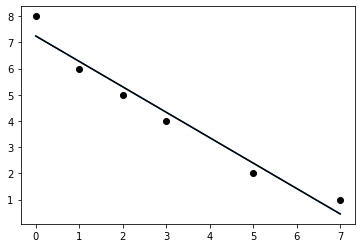

In [4]:

import numpy as np
import matplotlib.pyplot as plt
def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n)/
        ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b


x = np.array([0, 1, 2, 3, 5, 7])
y = np.array([8, 6, 5, 4, 2, 1])

a, b = reg1dim(x, y)

y_fit = a*x + b


plt.scatter(x, y, color="k")
plt.plot([0, x.max()], [b, a * x.max() + b]) #(0, b)地点から(xの最大値,ax + b)地点までの線
plt.plot(x, y_fit, color = 'k')
plt.show()

In [22]:
Emax_res_list = [[]]
c = [0, 1, 2]

Emax_res_list.append(c)
Emax_res_list.append(c)
Emax_res_list

[[], [0, 1, 2], [0, 1, 2]]